# Pymaceuticals Inc.
---

### Analysis

Observations:
1. Based on the Summary Statistics table, Capomulin outperformed most other treatment regimens with regards to decreasing the size of the tumor's volume. Only one drug did better than Capomulin, to a small degree; that drug is Ramicane.
2. When viewing the line graph "Capomulin Treatment of Mouse l509", there generally appears to be a negative relationship between timepoint and the tumor's volumme. 
3. Additionally, the size of the tumor for Mouse l509 began to increase prior to the last timepoint. This seems concerning as the goal of the treatment is to reduce the size of the tumor. However, looking at how the tumor behaved with earlier timepoints, there seems to be a spike in the size of the tumor right before it shrinks significantly. It could be expected that that trend will continue as time and treatment goes on.
4. The box plots show that the overall average tumor volume size treated with Capomulin is lower than those of the other treatments: Infubinol and Ceftamin. Between Capomulin and Ramicane, Capomulin appears more left skewed and Ramicane is presenting with a more symmetrical distribution. They both seem to perform equally well at reducing tumor volumes and neither presented with outliers.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
print(combined_data.columns)
print(combined_data.shape)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')
(1893, 8)


In [3]:
# Checking the number of mice.
len(combined_data['Mouse ID'].value_counts())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_data['Mouse ID'].value_counts())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [9]:
#how to use groupby() https://www.youtube.com/watch?v=qy0fDqoMJx8
#df.groupby('column name').numerical_column_name.mean()
clean_mice_data.head()
drug_and_tumor = clean_mice_data[['Drug Regimen','Tumor Volume (mm3)']]
#drug_and_tumor
grouped_df = drug_and_tumor.groupby('Drug Regimen')
mean = grouped_df.mean()
print(mean)


              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.675741
Ceftamin               52.591172
Infubinol              52.884795
Ketapril               55.235638
Naftisol               54.331565
Placebo                54.033581
Propriva               52.320930
Ramicane               40.216745
Stelasyn               54.233149
Zoniferol              53.236507


In [10]:
median = grouped_df.median()
print(median)

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              41.557809
Ceftamin               51.776157
Infubinol              51.820584
Ketapril               53.698743
Naftisol               52.509285
Placebo                52.288934
Propriva               50.446266
Ramicane               40.673236
Stelasyn               52.431737
Zoniferol              51.818479


In [11]:
var = grouped_df['Tumor Volume (mm3)'].var()
print(var)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64


In [12]:
std = grouped_df['Tumor Volume (mm3)'].std()
print(std)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [13]:
#how to calculate sem from https://www.w3schools.com/python/pandas/ref_df_sem.asp#:~:text=The%20sem()%20method%20calculates,the%20mean%20for%20each%20row.
sem = grouped_df.sem()
print(sem)

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin               0.329346
Ceftamin                0.469821
Infubinol               0.492236
Ketapril                0.603860
Naftisol                0.596466
Placebo                 0.581331
Propriva                0.544332
Ramicane                0.320955
Stelasyn                0.573111
Zoniferol               0.516398


In [14]:
#coding help from Module 4 homework 
#math_scores_by_grade =pd.concat([ninth_grader_math_scores,tenth_grader_math_scores, eleventh_grader_math_scores,
 #                                twelfth_grader_math_scores], axis =1)
    
# math_scores_by_grade_renamed = ['9th','10th', '11th', '12th']
# math_scores_by_grade.columns = math_scores_by_grade_renamed
# math_scores_by_grade.columns

summary_statistics = pd.concat([mean, median,var,std,sem], axis =1)
#summary_statistics

summary_statistics_renamed =['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance',
                             'Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
summary_statistics.columns = summary_statistics_renamed
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [16]:
#clean_mice_data
#drug_and_tumor

#grouped_df

df2 = clean_mice_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

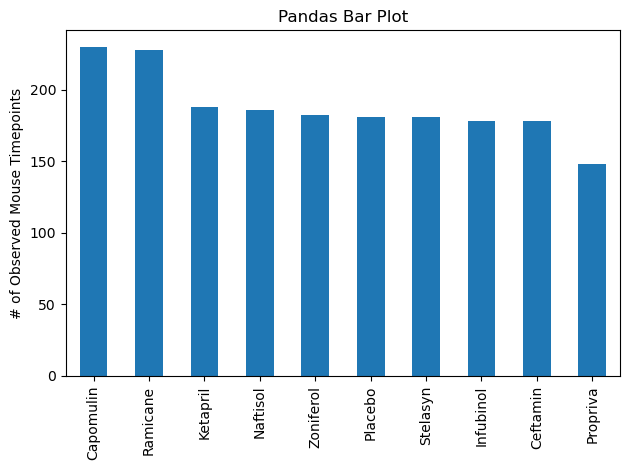

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = clean_mice_data['Drug Regimen'].value_counts()

#,'Timepoint']].groupby('Drug Regimen').count()
bar_data.plot(kind = 'bar', ylabel = '# of Observed Mouse Timepoints', title = "Pandas Bar Plot")
plt.show
plt.tight_layout()

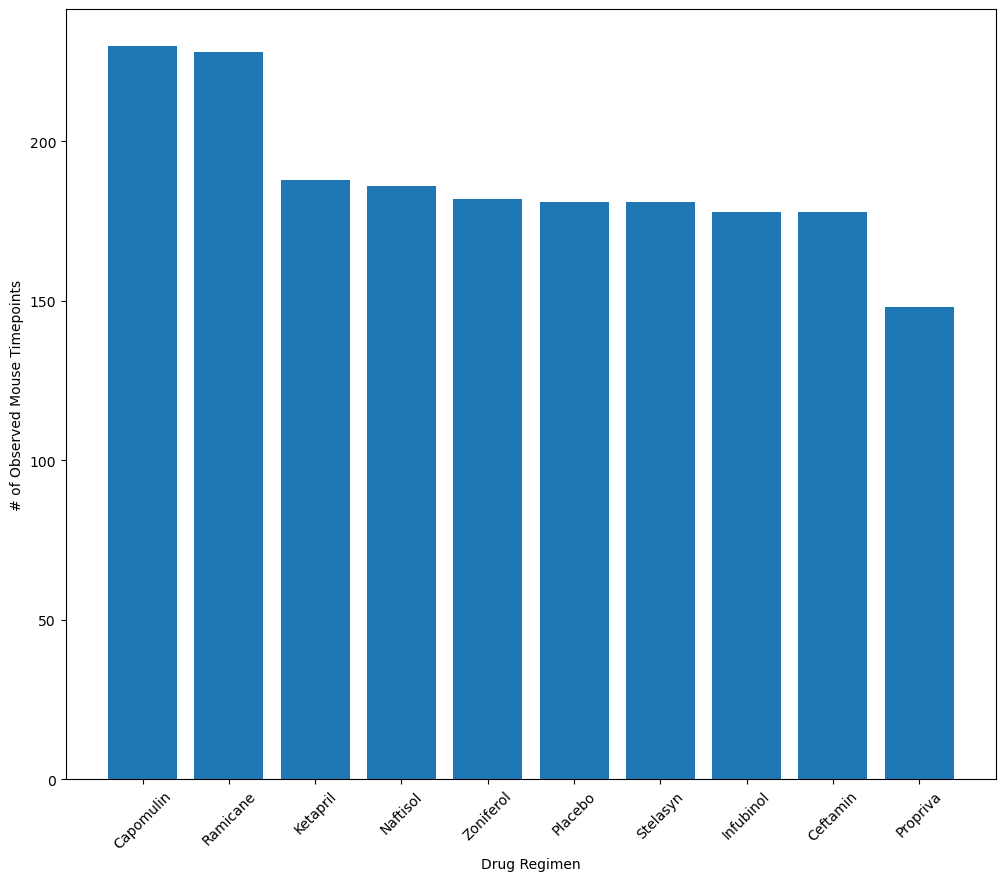

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# bar_data = clean_mice_data[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count()
# #bar_data
# clean_mice_data['Drug Regimen'].unique()
# x = [1,2,3,4,5,6,7,8,9,10] #(1, len(clean_mice_data['Drug Regimen'].unique()),1)
# y_values = bar_data['Timepoint']
# y = [y_values[0],y_values[1], y_values[2],y_values[3],y_values[4],y_values[5],y_values[6],y_values[7],y_values[8],
#      y_values[9]]

x = bar_data.index
y = bar_data.values
plt.bar(x,y)
plt.xticks(rotation = 45)
# plt.xticks(tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
#        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

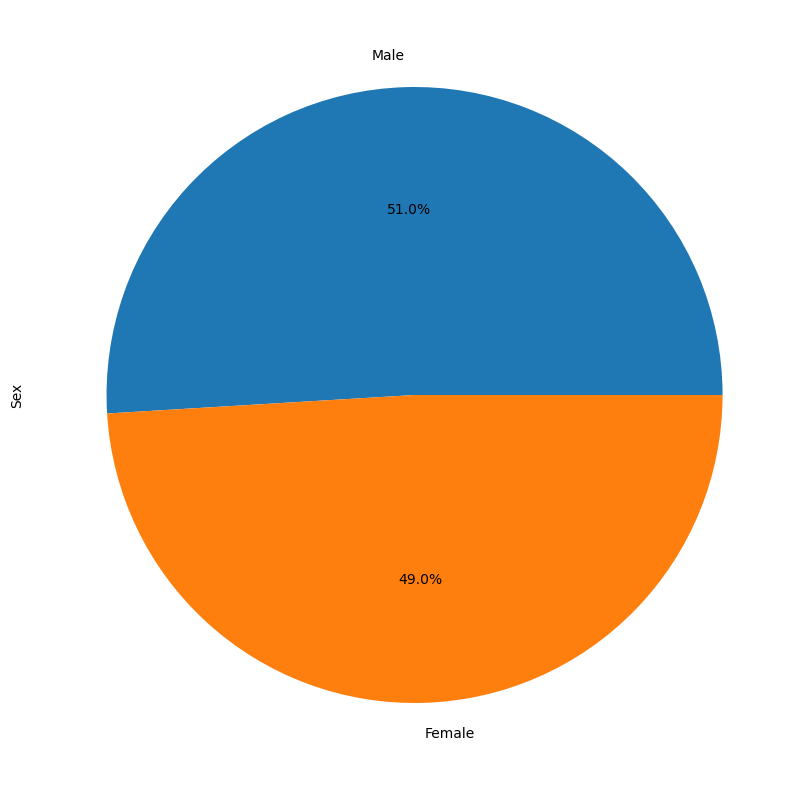

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mice_data['Sex'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

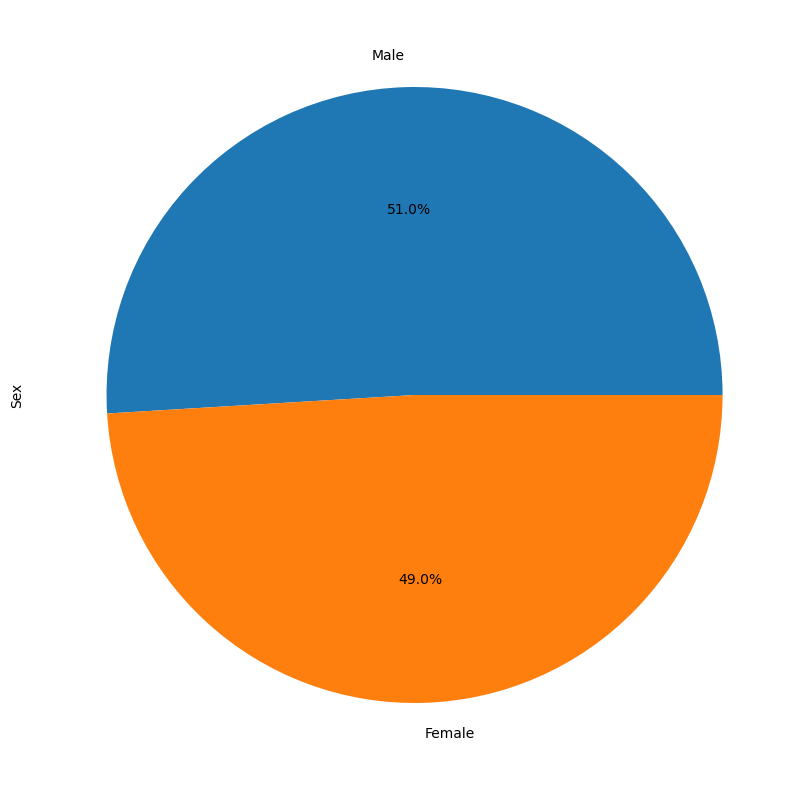

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
clean_mice_data['Sex'].value_counts()
sizes = ['958', '922']

plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.ylabel('Sex')
#plt.rcParams['figure.figsize'] = ['10','6']
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#clean_mice_data[['Drug Regimen','Timepoint']],(clean_mice_data.groupby('Timepoint').max())

# Start by getting the last (greatest) timepoint for each mouse


max_df= clean_mice_data.groupby('Mouse ID')[['Timepoint']].max().reset_index()
max_df

# #how to set index from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
# new_df = clean_mice_data.set_index('Mouse ID')
# new_new_df = new_df[['Drug Regimen','Timepoint','Tumor Volume (mm3)']].groupby('Mouse ID').value_counts()
# new_new_df

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_df,clean_mice_data, on=["Mouse ID","Timepoint"], how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged_df.loc[merged_df['Drug Regimen']==t]['Tumor Volume (mm3)']    
    #print(tumor_data)
    # add subset 
    tumor_vol_data.append(tumor_data)
#print(tumor_vol_data)
        
    # Determine outliers using upper and lower bounds
    #code from https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
    q1 = tumor_data.quantile(0.25)
    q3 = tumor_data.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = tumor_data.loc[(tumor_data < fence_low) | (tumor_data > fence_high)]
    print(f"{t}'s potential outliers: {df_out}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


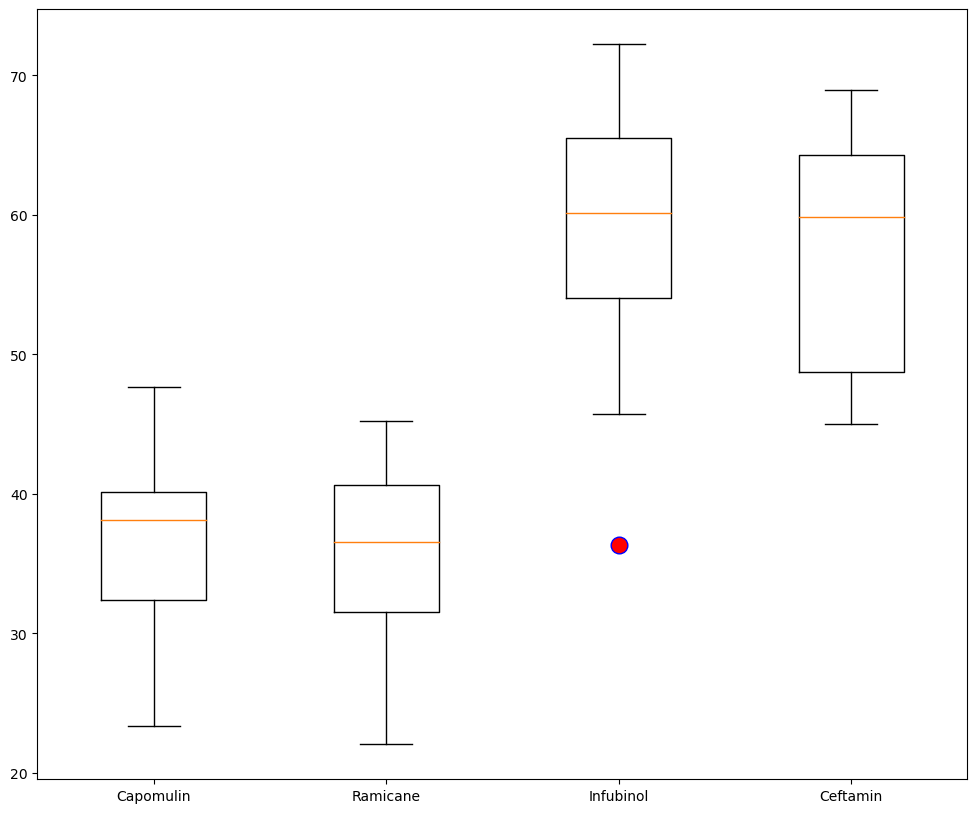

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')
 
#coloring code from https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib    
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

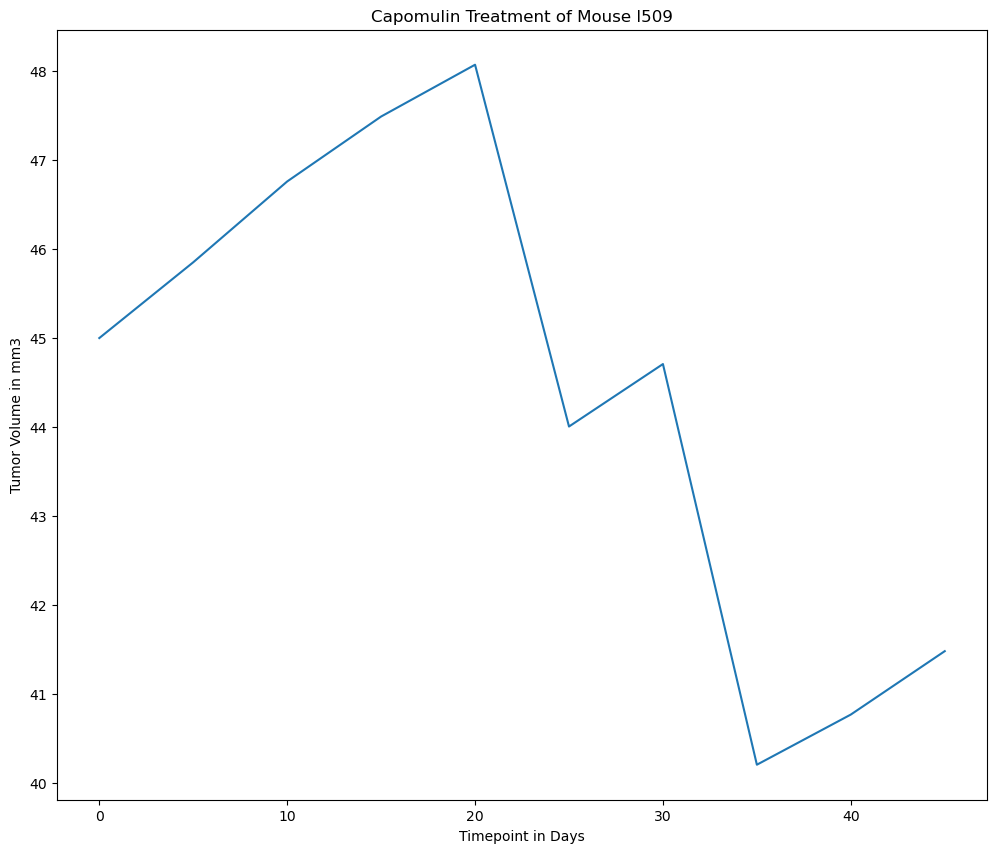

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
lineplot = new_df.loc[['l509'],['Tumor Volume (mm3)', 'Timepoint','Drug Regimen']]
lineplot

x = lineplot['Timepoint'] #timepoint (days)
y = lineplot['Tumor Volume (mm3)'] #tumor volume (mm3)

plt.plot(x,y)
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume in mm3')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

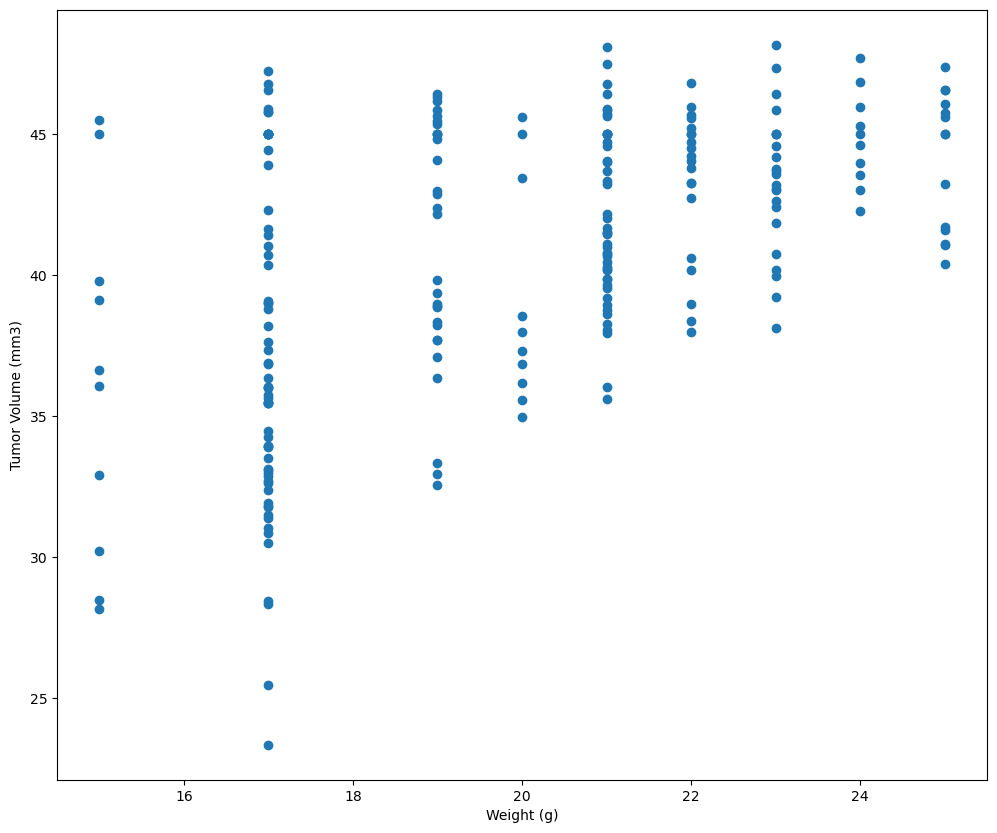

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#clean_mice_data
scatter_index = clean_mice_data.set_index('Drug Regimen')[['Weight (g)','Tumor Volume (mm3)']]
scatter_index = scatter_index.loc[['Capomulin'],['Weight (g)','Tumor Volume (mm3)']]
x = scatter_index['Weight (g)']
y = scatter_index['Tumor Volume (mm3)']

plt.scatter(x,y)
plt.rcParams['figure.figsize']=[8,6]
plt.ylim = (34,46)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [713]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


R-squared: 0.276360


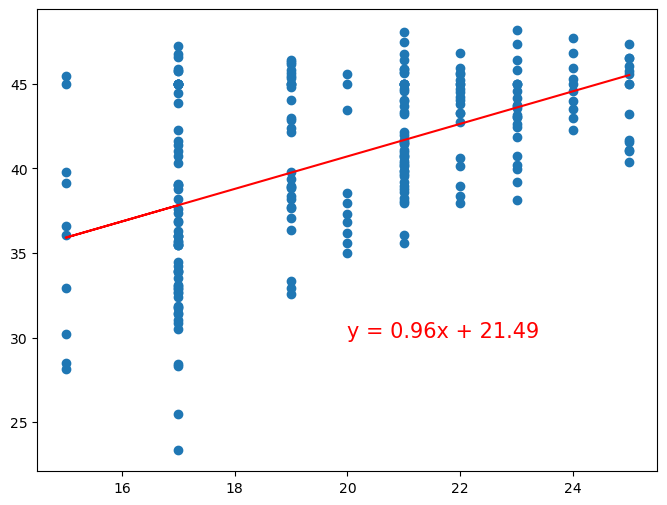

The correlation between mouse weight and the average tumor volume is 0.53


In [104]:
max_df= clean_mice_data.groupby('Mouse ID')[['Timepoint']].max().reset_index()
scatter_index = clean_mice_data.set_index('Drug Regimen')[['Weight (g)','Tumor Volume (mm3)']]
scatter_index = scatter_index.loc[['Capomulin'],['Weight (g)','Tumor Volume (mm3)']]#.mean()
scatter_index

##SOMETHING'S WRONG WITH MY DATA...IF STILL GETTING ERRORS AFTER I FIX IT THEN CHECK THE COORDINATES..?
x = scatter_index['Weight (g)']
y = scatter_index['Tumor Volume (mm3)']

#coding from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
res = st.linregress(x, y)
res
print(f"R-squared: {res.rvalue**2:.6f}")


##slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
## To get coefficient of determination (r_squared)
## print("r-squared:", r_value**2)
    
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, color="red")
plt.scatter(x,y)
plt.rcParams['figure.figsize']=[8,6]
plt.ylim = (34,46)
plt.annotate(line_eq,xy=(20,30),fontsize =15,color='red')
#plt.xlabel('Weight (g)')
#plt.ylabel('Tumor Volume (mm3)')

plt.show()

#0.84
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")